In [1]:
# Personal version of Cholla plot_sod.py plotting script
import h5py
%pylab inline
pylab.rcParams.update({'font.size': 18})
pylab.rcParams.update({'font.family': 'serif'})
pylab.rcParams.update({'mathtext.default':'regular'})
pylab.rcParams.update({'mathtext.fontset':'stixsans'})
pylab.rcParams.update({'axes.linewidth': 1.5})
pylab.rcParams.update({'xtick.direction':'in'})
pylab.rcParams.update({'xtick.major.size': 5})
pylab.rcParams.update({'xtick.major.width': 1.25 })
pylab.rcParams.update({'xtick.minor.size': 2.5})
pylab.rcParams.update({'xtick.minor.width': 1.25 })
pylab.rcParams.update({'ytick.direction':'in'})
pylab.rcParams.update({'ytick.major.size': 5})
pylab.rcParams.update({'ytick.major.width': 1.25 })
pylab.rcParams.update({'ytick.minor.size': 2.5})
pylab.rcParams.update({'ytick.minor.width': 1.25 })

Populating the interactive namespace from numpy and matplotlib


## Sod Shock Tube
The Sod shock tube problem is a common test for hydrodynamics codes. Consists of a 1D Riemann problem with the following parameters, for the left and right states of an ideal gas:
$$
\left(\begin{array}{c} 
\rho_L \\
P_L \\
u_L
\end{array}\right)=
\left(\begin{array}{c} 
1.0 \\ 
1.0 \\
0.0
\end{array}\right),\,
\left(\begin{array}{c} 
\rho_R \\
P_R \\
u_R
\end{array}\right)=
\left(\begin{array}{c} 
0.125 \\ 
0.1 \\
0.0
\end{array}\right).
$$
Here, $\rho$ is the density, $P$ is the pressure, and $u$ is the velocity. The solution to the problem is given by solving the Euler equations.

More information: https://en.wikipedia.org/wiki/Sod_shock_tube

## Cholla Input File
```
#
# Parameter File for 1D Sod Shock tube
#

################################################
# number of grid cells in the x dimension
nx=100
# number of grid cells in the y dimension
ny=1
# number of grid cells in the z dimension
nz=1
# final output time
tout=0.2
# time interval for output
outstep=0.2
# name of initial conditions
init=Riemann
# domain properties
xmin=0.0
ymin=0.0
zmin=0.0
xlen=1.0
ylen=1.0
zlen=1.0
# type of boundary conditions
xl_bcnd=3
xu_bcnd=3
yl_bcnd=0
yu_bcnd=0
zl_bcnd=0
zu_bcnd=0
# path to output directory
outdir=./

#################################################
# Parameters for 1D Riemann problems
# density of left state
rho_l=1.0
# velocity of left state
v_l=0.0
# pressure of left state
P_l=1.0
# density of right state
rho_r=0.1
# velocity of right state
v_r=0.0
# pressure of right state
P_r=0.1
# location of initial discontinuity
diaph=0.5
# value of gamma
gamma=1.4
```

In [2]:
dnamein = "./sod_1D/"
dnameout = "./sod_1D/"
i = 1
DE = 0 # dual energy flag - 1 if the test was run with dual energy
f = h5py.File(dnamein + str(i) + ".h5", "r")
head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
print(f"Keywords: {head.keys()}")

Keywords: <KeysViewHDF5 ['bounds', 'density_unit', 'dims', 'domain', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>


In [3]:
nx = head["dims"][0]
xrange = np.arange(0, nx + 1)
gamma = head["gamma"][0]
print(f"nx: {nx}, gamma: {gamma}")
d = np.array(f["density"]) # mass density
mx = np.array(f["momentum_x"]) # x-momentum
my = np.array(f["momentum_y"]) # y-momentum
mz = np.array(f["momentum_z"]) # z-momentum
E = np.array([f["Energy"]]) # total energy density

vx = mx / d
vy = my / d
vz = mz / d

if DE:
    e  = np.array(f['GasEnergy'])
    p  = e*(gamma-1.0) # pressure
    ge = e/d # internal energy
else: 
    p  = (E - 0.5*d*(vx*vx + vy*vy + vz*vz)) * (gamma - 1.0) # pressure
    ge  = p/d/(gamma - 1.0) # internal energy

nx: 100, gamma: 1.4


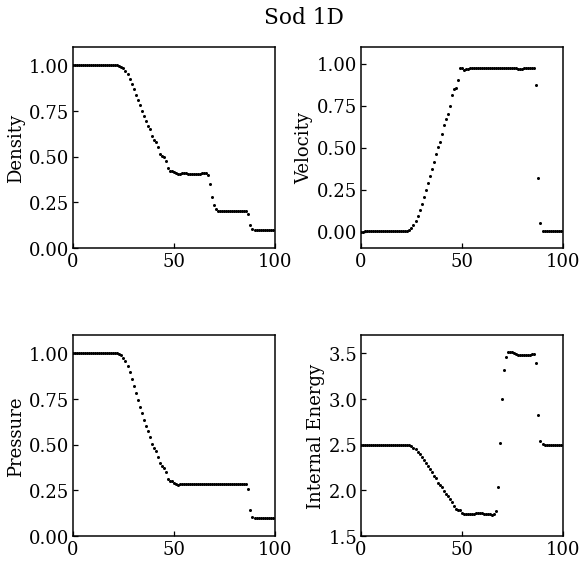

In [4]:
fig = plt.figure(figsize=(8, 8))
ax1 = plt.axes([0.1, 0.6, 0.35, 0.35])
plt.axis([0, nx, 0, 1.1])
ax1.plot(d, 'o', markersize=2, color='black')
plt.ylabel('Density')
ax2 = plt.axes([0.6, 0.6, 0.35, 0.35])
plt.axis([0, nx, -0.1, 1.1])
ax2.plot(vx, 'o', markersize=2, color='black')
plt.ylabel('Velocity')
ax3 = plt.axes([0.1, 0.1, 0.35, 0.35])
plt.axis([0, nx, 0, 1.1])
ax3.plot(p[0], 'o', markersize=2, color='black')
plt.ylabel('Pressure')
ax4 = plt.axes([0.6, 0.1, 0.35, 0.35])
plt.axis([0, nx, 1.5, 3.7])
ax4.plot(ge[0], 'o', markersize=2, color='black')
plt.ylabel('Internal Energy')
plt.suptitle("Sod 1D", y=1.02)
plt.show()